# Logistic Regression Using SKlearn

Import necessary libraries

In [5]:

import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression model
from sklearn.datasets import load_iris  # Load the Iris dataset
from sklearn.model_selection import train_test_split  # Split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Standardize feature values


In [6]:
# Load the Iris dataset
data = load_iris()

In [7]:
# Extract the first two features for easy visualization
X = data.data[:, :2]  

# Convert the target into a binary classification problem: 
#  - Class 0 (Setosa) remains 0
#  - Classes 1 and 2 (Versicolor & Virginica) become 1 (Non-Setosa)
y = (data.target != 0).astype(int)  

Convert the target into a binary classification problem: 

In [8]:
#  - Class 0 (Setosa) remains 0
#  - Classes 1 and 2 (Versicolor & Virginica) become 1 (Non-Setosa)
y = (data.target != 0).astype(int)  

Split the dataset into training (80%) and testing (20%) sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Standardize the features: 
  - Mean = 0, Standard Deviation = 1
  - Helps improve model performance

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit scaler on training data and transform
X_test = scaler.transform(X_test)  # Transform test data using the same scaler


Create and train the logistic regression model

In [11]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [12]:
# Create a mesh grid for visualization
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1  # Define x-axis range
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1  # Define y-axis range

# Generate a grid of points across the feature space
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))


 Predict the class for each grid point

In [13]:
Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])  # Flatten grid and predict
Z = Z.reshape(xx.shape)  # Reshape predictions to match grid shape


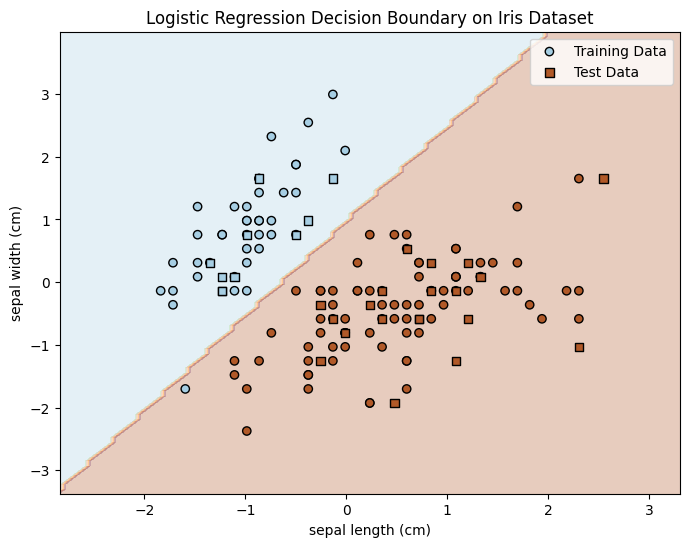

In [14]:
# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)  # Plot decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired, label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolors='k', cmap=plt.cm.Paired, label='Test Data')
plt.xlabel(data.feature_names[0])  # Label x-axis with feature name
plt.ylabel(data.feature_names[1])  # Label y-axis with feature name
plt.title("Logistic Regression Decision Boundary on Iris Dataset")  # Title
plt.legend()  # Show legend
plt.show()